In [ ]:
# Desvatagem de Lagrange: temos que aumentar o grau do polinomio. 
# O que custa muito computacionalmente falando

Polinômio interpolador: p(x) = -0.1875x³ + 1.6875x² + -2.8125x + 4.3125


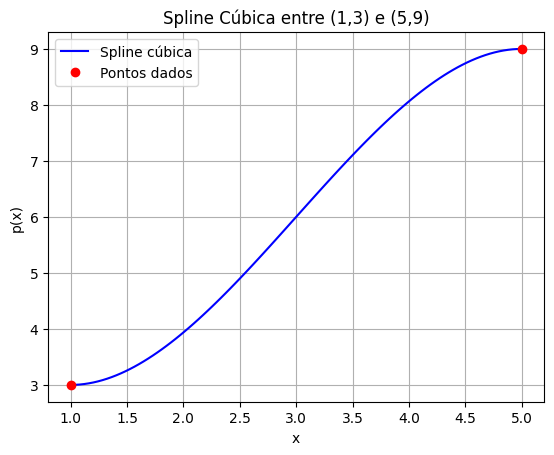

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Queremos resolver o sistema:
# p(x) = a*x^3 + b*x^2 + c*x + d
# Usando as condições:
# p(1) = 3 → a*1^3 + b*1^2 + c*1 + d = 3
# p(5) = 9 → a*125 + b*25 + c*5 + d = 9
# p'(1) = 0 → 3a*1^2 + 2b*1 + c = 0
# p'(5) = 0 → 3a*25 + 2b*5 + c = 0

# Sistema linear: Ax = B, onde x = [a, b, c, d]

def solve_spline():
    # Sistema linear: p(x) = a*x^3 + b*x^2 + c*x + d
    # Condições:
    # p(1) = 3, p(5) = 9, p'(1) = 0, p'(5) = 0

    A = [
        [1**3, 1**2, 1, 1],  # p(1) = 3
        [5**3, 5**2, 5, 1],  # p(5) = 9
        [3*1**2, 2*1, 1, 0],  # p'(1) = 0
        [3*5**2, 2*5, 1, 0]   # p'(5) = 0
    ]

    B = [3, 9, 0, 0]
    n = len(B)

    # Eliminação de Gauss
    for i in range(n):
        pivot = A[i][i]
        for j in range(i, n):
            A[i][j] /= pivot
        B[i] /= pivot

        for k in range(i+1, n):
            factor = A[k][i]
            for j in range(i, n):
                A[k][j] -= factor * A[i][j]
            B[k] -= factor * B[i]

    # Substituição reversa
    x = [0] * n
    for i in range(n-1, -1, -1):
        x[i] = B[i]
        for j in range(i+1, n):
            x[i] -= A[i][j] * x[j]

    a, b, c, d = x
    print(f"Polinômio interpolador: p(x) = {a:.4f}x³ + {b:.4f}x² + {c:.4f}x + {d:.4f}")

    # Plotando o polinômio
    xs = np.linspace(1, 5, 100)
    ys = a * xs**3 + b * xs**2 + c * xs + d

    plt.plot(xs, ys, label='Spline cúbica', color='blue')
    plt.plot([1, 5], [3, 9], 'ro', label='Pontos dados')
    plt.title('Spline Cúbica entre (1,3) e (5,9)')
    plt.xlabel('x')
    plt.ylabel('p(x)')
    plt.grid(True)
    plt.legend()
    plt.show()

solve_spline()

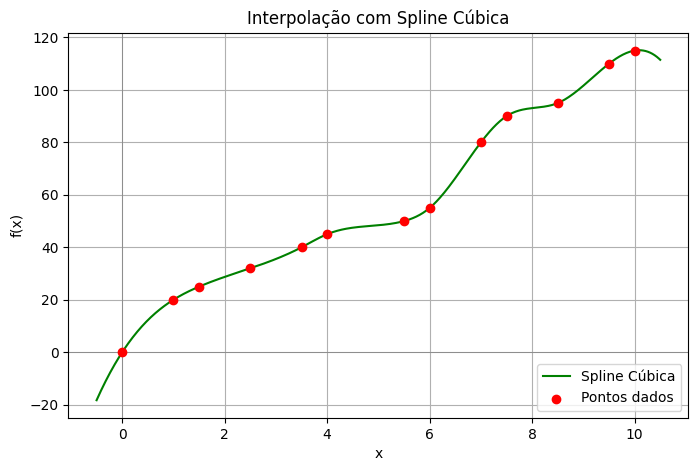

In [3]:
	
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Pontos conhecidos (dados)
x_vals = [0, 1, 1.5, 2.5, 3.5, 4.0, 5.5, 6.0, 7.0, 7.5, 8.5, 9.5, 10]
y_vals = [0, 20, 25, 32, 40, 45, 50, 55, 80, 90, 95, 110, 115]

# Cria o spline cúbico
spline = CubicSpline(x_vals, y_vals)

# Geração de pontos para o gráfico
x_plot = np.linspace(min(x_vals) - 0.5, max(x_vals) + 0.5, 500)
y_plot = spline(x_plot)

# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_plot, label='Spline Cúbica', color='green')
plt.scatter(x_vals, y_vals, color='red', label='Pontos dados', zorder=5)
plt.title('Interpolação com Spline Cúbica')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.show()

46.633359500967245


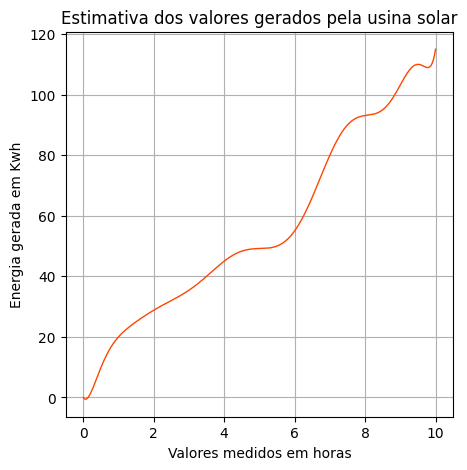

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Avalia o polinômio interpolador usando polinômios de Lagrange
def interpolL(x, T):
    Soma = 0
    for i in range(len(T)):
        produto = 1.0
        for j in range(len(T)):
            if j == i:
                continue
            produto = produto * (x - T[j][0]) / (T[i][0] - T[j][0])
        Soma = Soma + T[i][1] * produto
    return Soma

# A tabela é uma lista de pares ordenados
T = [
    (0, 0), (1, 20), (1.5, 25), (2.5, 32), (3.5, 40), (4.0, 45),
    (5.5, 50), (6.0, 55), (7.0, 80), (7.5, 90), (8.5, 95), (9.5, 110), (10, 115)
]

# Define o polinômio interpolador p(x)
p = lambda x: interpolL(x, T)

x = np.linspace(0, 10, 500)

plt.figure(figsize=(5, 5))

plt.plot(x, p(x), color='#FF4500', marker='', linewidth=1.0)
plt.title('Estimativa dos valores gerados pela usina solar')
plt.xlabel('Valores medidos em horas')
plt.ylabel('Energia gerada em Kwh')

print(p(4.2))

plt.grid()

plt.show()

Equação da reta ajustada: y = 10.8503x + 2.7271


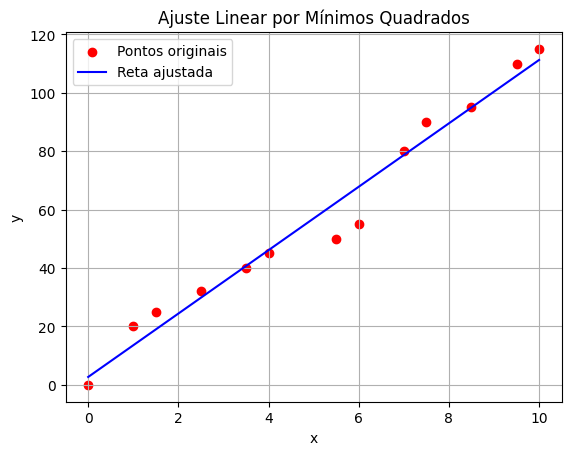

In [5]:
import matplotlib.pyplot as plt

def ajuste_linear_minimos_quadrados():
    # Pontos dados
    T = [
        (0, 0), (1, 20), (1.5, 25), (2.5, 32), (3.5, 40),
        (4.0, 45), (5.5, 50), (6.0, 55), (7.0, 80),
        (7.5, 90), (8.5, 95), (9.5, 110), (10, 115)
    ]

    n = len(T)
    soma_x = soma_y = soma_x2 = soma_xy = 0

    for x, y in T:
        soma_x += x
        soma_y += y
        soma_x2 += x * x
        soma_xy += x * y

    # Sistema linear:
    # a * soma_x2 + b * soma_x = soma_xy
    # a * soma_x + b * n = soma_y

    A = [
        [soma_x2, soma_x],
        [soma_x, n]
    ]
    B = [soma_xy, soma_y]

    # Eliminação de Gauss
    pivot = A[0][0]
    A[0][0] /= pivot
    A[0][1] /= pivot
    B[0] /= pivot

    factor = A[1][0]
    A[1][0] -= factor * A[0][0]
    A[1][1] -= factor * A[0][1]
    B[1] -= factor * B[0]

    pivot = A[1][1]
    A[1][1] /= pivot
    B[1] /= pivot

    # Substituição reversa
    b = B[1]
    a = B[0] - A[0][1] * b

    print(f"Equação da reta ajustada: y = {a:.4f}x + {b:.4f}")

    # Plotando gráfico
    xs = [x for x, y in T]
    ys = [y for x, y in T]
    reta_x = [min(xs), max(xs)]
    reta_y = [a * x + b for x in reta_x]

    plt.scatter(xs, ys, color='red', label='Pontos originais')
    plt.plot(reta_x, reta_y, color='blue', label='Reta ajustada')
    plt.title('Ajuste Linear por Mínimos Quadrados')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()

ajuste_linear_minimos_quadrados()

Equação ajustada: ln(v_R) = 2.4776 + -0.1002 * t
RC = 9.98 s
Capacitância C = 2.00e-06 F = 2.00 µF


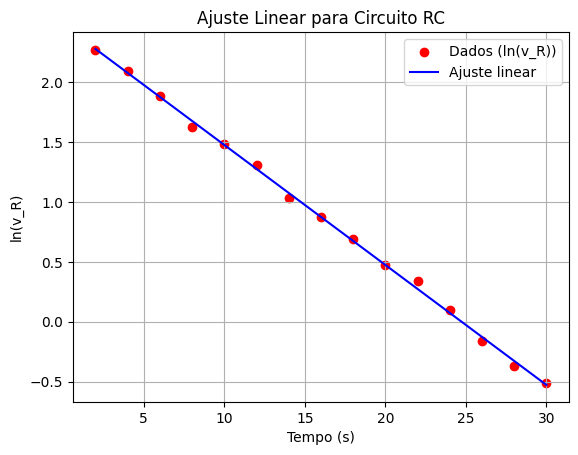

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def ajuste_linear_rc():
    # Dados experimentais (t, v_R)
    dados = [
        (2, 9.7), (4, 8.1), (6, 6.6), (8, 5.1), (10, 4.4),
        (12, 3.7), (14, 2.8), (16, 2.4), (18, 2.0), (20, 1.6),
        (22, 1.4), (24, 1.1), (26, 0.85), (28, 0.69), (30, 0.6)
    ]

    # Transformação: y = ln(v_R)
    t = np.array([x for x, y in dados])
    y = np.array([np.log(y) for x, y in dados])

    # Cálculo dos somatórios
    n = len(t)
    soma_t = sum(t)
    soma_y = sum(y)
    soma_t2 = sum(t**2)
    soma_ty = sum(t * y)

    # Coeficientes da reta (y = a + b*t)
    b = (n * soma_ty - soma_t * soma_y) / (n * soma_t2 - soma_t**2)
    a = (soma_y - b * soma_t) / n

    print(f"Equação ajustada: ln(v_R) = {a:.4f} + {b:.4f} * t")

    # Cálculo de RC e C
    RC = -1 / b
    R = 5e6  # 5 MΩ
    C = RC / R

    print(f"RC = {RC:.2f} s")
    print(f"Capacitância C = {C:.2e} F = {C * 1e6:.2f} µF")

    # Gráfico
    plt.scatter(t, y, color='red', label='Dados (ln(v_R))')
    plt.plot(t, a + b * t, color='blue', label='Ajuste linear')
    plt.xlabel('Tempo (s)')
    plt.ylabel('ln(v_R)')
    plt.title('Ajuste Linear para Circuito RC')
    plt.grid(True)
    plt.legend()
    plt.show()

ajuste_linear_rc()